In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import Image
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import ndimage, misc
import skimage
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Sequential
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

In [101]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')

IndexError: list index out of range

In [2]:
filelist  = []

input_images_path="C:/dataset/images"
for dirname, _, filenames in os.walk(input_images_path):
    for filename in filenames:
        filelist.append(os.path.join(dirname, filename))

In [3]:
len(filelist)

126607

In [4]:
filelist

['C:/dataset/images\\Abyssinian\\12136161_252.jpg',
 'C:/dataset/images\\Abyssinian\\13743713_251.jpg',
 'C:/dataset/images\\Abyssinian\\14092337_250.jpg',
 'C:/dataset/images\\Abyssinian\\14210840_249.jpg',
 'C:/dataset/images\\Abyssinian\\14475392_248.jpg',
 'C:/dataset/images\\Abyssinian\\16485182_247.jpg',
 'C:/dataset/images\\Abyssinian\\16734355_246.jpg',
 'C:/dataset/images\\Abyssinian\\17041760_245.jpg',
 'C:/dataset/images\\Abyssinian\\17060240_244.jpg',
 'C:/dataset/images\\Abyssinian\\17361971_242.jpg',
 'C:/dataset/images\\Abyssinian\\17361980_243.jpg',
 'C:/dataset/images\\Abyssinian\\17704905_241.jpg',
 'C:/dataset/images\\Abyssinian\\17870903_240.jpg',
 'C:/dataset/images\\Abyssinian\\35021741_239.jpg',
 'C:/dataset/images\\Abyssinian\\35374431_238.jpg',
 'C:/dataset/images\\Abyssinian\\36865042_237.jpg',
 'C:/dataset/images\\Abyssinian\\37673424_236.jpg',
 'C:/dataset/images\\Abyssinian\\37771828_235.jpg',
 'C:/dataset/images\\Abyssinian\\37865356_234.jpg',
 'C:/dataset

In [49]:
labels_needed = ['American Bobtail', 'American Curl', 'American Shorthair', 'Applehead Siamese', 'Balinese', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Burmese', 'Calico', 'Chartreux', 'Cornish Rex', 'Devon Rex', 'Dilute Calico', 'Dilute Tortoiseshell', 'Domestic Long Hair', 'Domestic Medium Hair', 'Egyptian Mau', 'Exotic Shorthair', 'Havana', 'Himalayan', 'Japanese Bobtail', 'Javanese', 'Korat', 'Maine Coon', 'Manx', 'Somali', 'Sphynx - Hairless Cat', 'Tabby', 'Tuxedo']

In [50]:
Filepaths = []
labels = []

for image_file in filelist:
    label = image_file.split(os.path.sep)[-2]
    if label in labels_needed:
        
        Filepaths.append(image_file)
        labels.append(label)

In [51]:
set(labels)

{'American Bobtail',
 'American Curl',
 'American Shorthair',
 'Applehead Siamese',
 'Balinese',
 'Bengal',
 'Birman',
 'Bombay',
 'British Shorthair',
 'Burmese',
 'Calico',
 'Chartreux',
 'Cornish Rex',
 'Devon Rex',
 'Dilute Calico',
 'Dilute Tortoiseshell',
 'Domestic Long Hair',
 'Domestic Medium Hair',
 'Egyptian Mau',
 'Exotic Shorthair',
 'Havana',
 'Himalayan',
 'Japanese Bobtail',
 'Javanese',
 'Korat',
 'Maine Coon',
 'Manx',
 'Somali',
 'Sphynx - Hairless Cat',
 'Tabby',
 'Tuxedo'}

In [52]:
len(Filepaths), len(labels)

(44875, 44875)

In [53]:
df = pd.DataFrame( list ( zip (Filepaths, labels) ), columns = ['Filepath', 'Labels'] )
df

Filepath            Labels
0      C:/dataset/images\American Bobtail\13611304_50...  American Bobtail
1      C:/dataset/images\American Bobtail\14395099_49...  American Bobtail
2      C:/dataset/images\American Bobtail\14936478_49...  American Bobtail
3      C:/dataset/images\American Bobtail\16263029_48...  American Bobtail
4      C:/dataset/images\American Bobtail\16433702_47...  American Bobtail
...                                                  ...               ...
44870           C:/dataset/images\Tuxedo\46803893_19.jpg            Tuxedo
44871           C:/dataset/images\Tuxedo\46803894_20.jpg            Tuxedo
44872           C:/dataset/images\Tuxedo\46804405_13.jpg            Tuxedo
44873            C:/dataset/images\Tuxedo\46806582_5.jpg            Tuxedo
44874            C:/dataset/images\Tuxedo\46806627_4.jpg            Tuxedo

[44875 rows x 2 columns]

In [54]:
from sklearn.utils import shuffle
df = (df.sample(frac = 1).reset_index()).drop(columns = 'index')
df

Filepath             Labels
0             C:/dataset/images\Bengal\28882311_6220.jpg             Bengal
1      C:/dataset/images\Dilute Calico\33002369_6833.jpg      Dilute Calico
2      C:/dataset/images\Dilute Calico\35224405_5544.jpg      Dilute Calico
3         C:/dataset/images\Cornish Rex\19649890_280.jpg        Cornish Rex
4             C:/dataset/images\Calico\45924260_3278.jpg             Calico
...                                                  ...                ...
44870      C:/dataset/images\Himalayan\35343880_2221.jpg          Himalayan
44871  C:/dataset/images\British Shorthair\22555084_1...  British Shorthair
44872      C:/dataset/images\Himalayan\36466788_1999.jpg          Himalayan
44873          C:/dataset/images\Tabby\46615416_9934.jpg              Tabby
44874         C:/dataset/images\Calico\45796787_3629.jpg             Calico

[44875 rows x 2 columns]

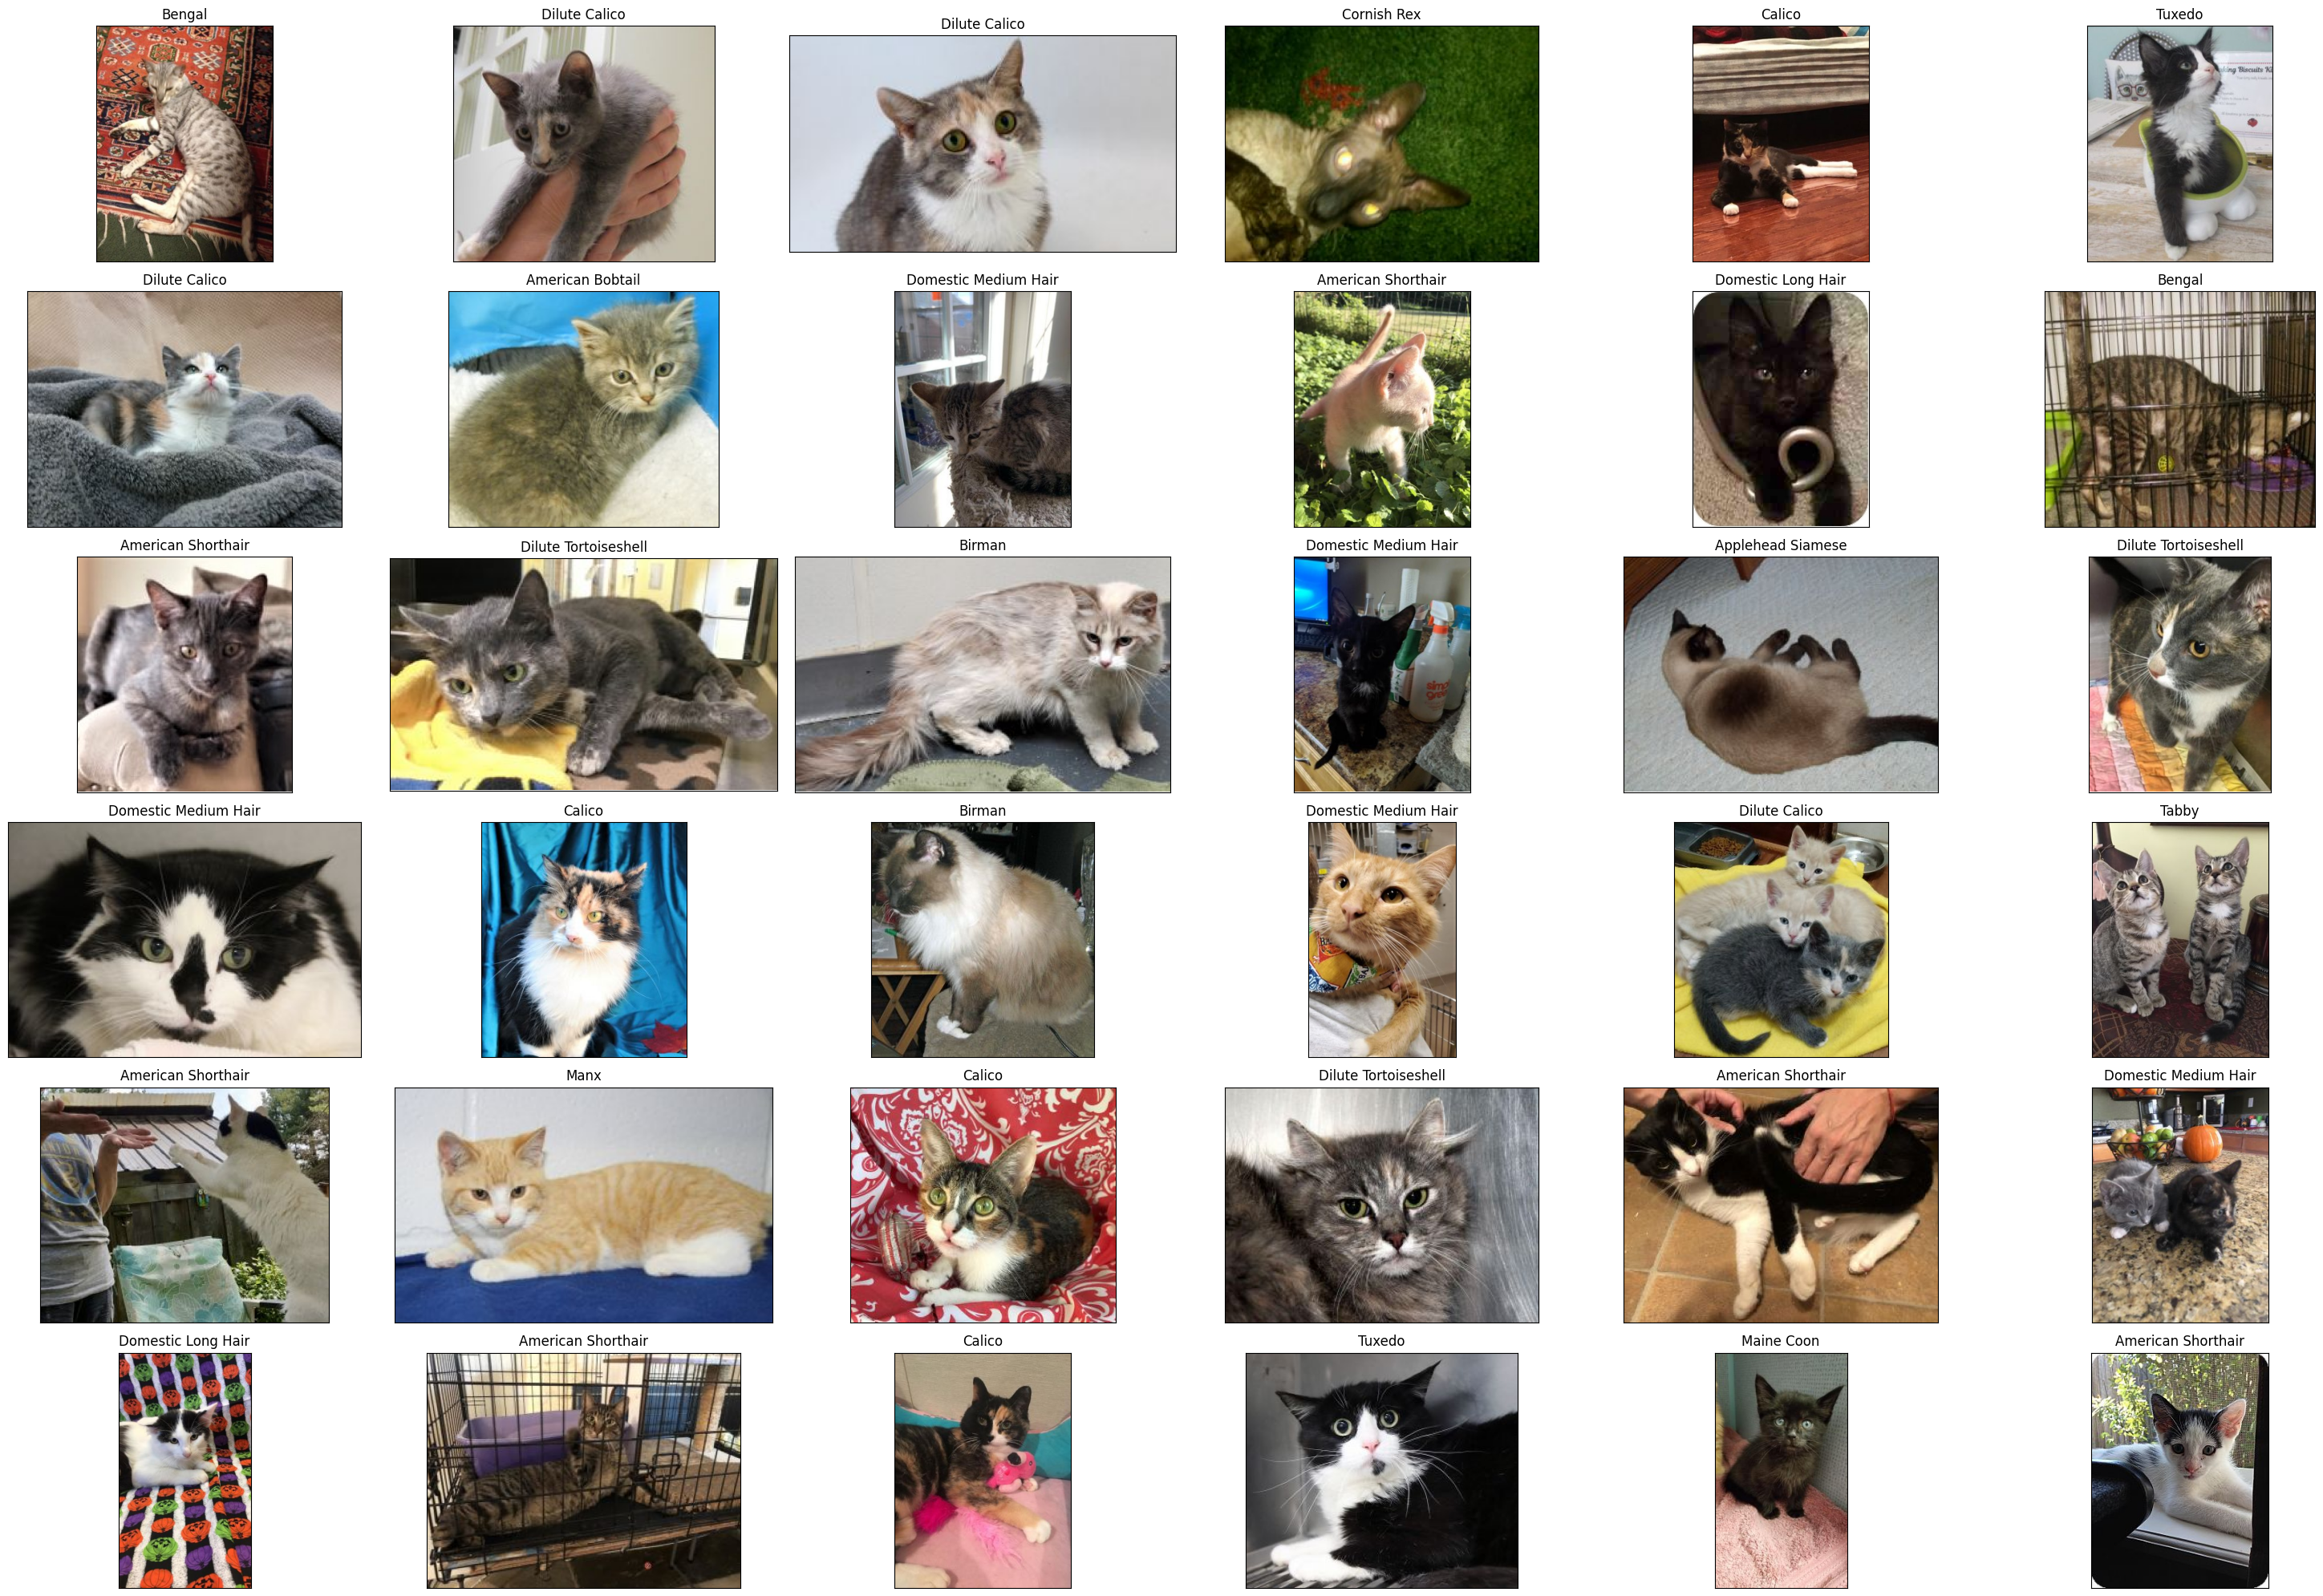

In [66]:
f, a = plt.subplots(nrows=6, ncols=6, figsize=(30,20),
                   subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    img = cv2.imread(df.Filepath[i])
    if img is not None:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(df.Labels[i])
    else:
        print("Error al cargar la imagen:", df.Filepath[i])
        
plt.tight_layout()
plt.show()

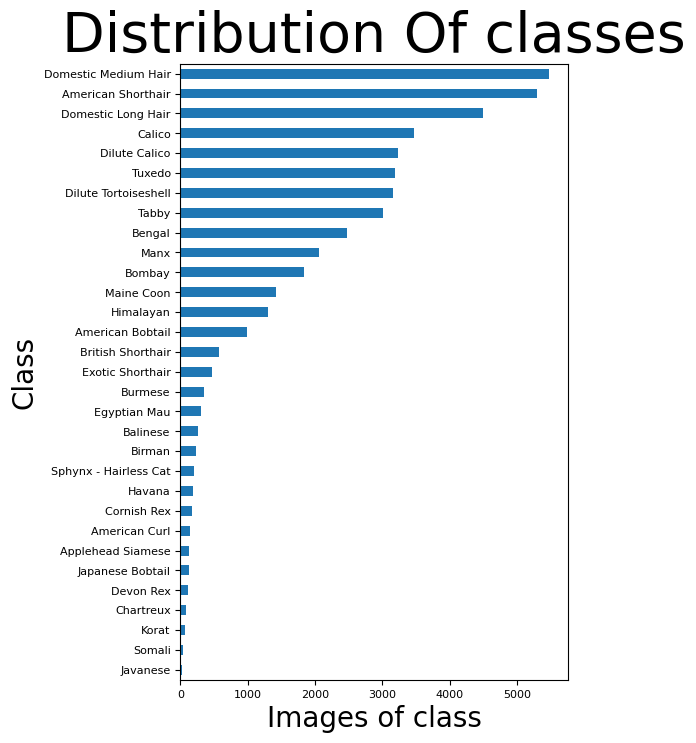

In [67]:
ax=pd.value_counts(df['Labels'],ascending=True).plot(kind='barh',
                                                       fontsize="8",
                                                       title="Distribution Of classes",
                                                       figsize=(5,8))
ax.set(xlabel="Images of class", ylabel="Class")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(40)
plt.show()

In [81]:
root_dir = 'C:/dataset/images'

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        try:
            filepath = os.path.join(subdir, file)
            img = Image.open(filepath)
            img.verify()
        except:
            print(f"La imagen {filepath} está dañada o no se puede abrir.")

In [119]:
x_random, y_random = next(x_train)

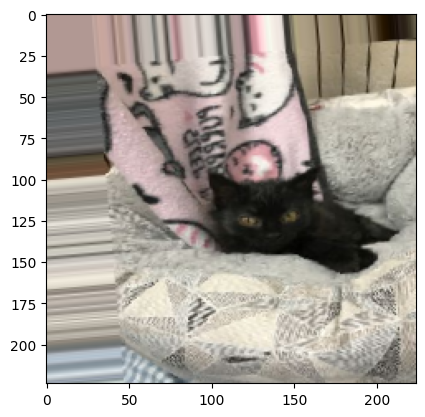

In [138]:
plt.imshow(x_random[1])
plt.show()

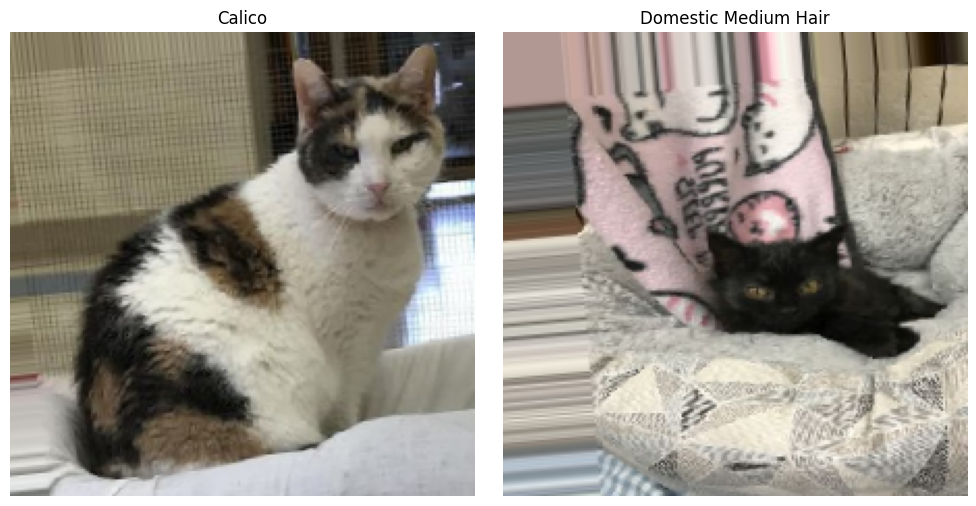

In [136]:
x_random = x_random[:2]
y_random = y_random[:2]

labels = (x_train.class_indices)
labels = dict((v,k) for k,v in labels.items())

# Mostrar las imágenes en una tabla con las etiquetas correspondientes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_random[i])
    ax.set_title(labels[np.argmax(y_random[i])])
    ax.set_xlabel('Etiqueta: ' + labels[np.argmax(y_random[i])])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [82]:
df.Labels.value_counts()

Domestic Medium Hair     5482
American Shorthair       5295
Domestic Long Hair       4499
Calico                   3468
Dilute Calico            3230
Tuxedo                   3181
Dilute Tortoiseshell     3152
Tabby                    3012
Bengal                   2477
Manx                     2059
Bombay                   1835
Maine Coon               1418
Himalayan                1301
American Bobtail          991
British Shorthair         567
Exotic Shorthair          471
Burmese                   344
Egyptian Mau              305
Balinese                  254
Birman                    227
Sphynx - Hairless Cat     209
Havana                    184
Cornish Rex               171
American Curl             149
Applehead Siamese         135
Japanese Bobtail          127
Devon Rex                 119
Chartreux                  84
Korat                      68
Somali                     36
Javanese                   25
Name: Labels, dtype: int64

In [83]:
train_ratio= .75
validation_ratio = 0.10
test_ratio = 0.15

train, test = train_test_split(df, test_size = test_ratio)
val, test = train_test_split(test, test_size = test_ratio/(test_ratio + validation_ratio))

In [84]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range=30,
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                horizontal_flip = 'true')

x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Filepath', y_col='Labels',  target_size=(224, 224), shuffle=False, batch_size=25, seed=20)
x_val = img_datagen.flow_from_dataframe(dataframe = val,  x_col='Filepath', y_col='Labels',  target_size=(224, 224), shuffle=False, batch_size=25, seed=20)
x_test = img_datagen.flow_from_dataframe(dataframe = test,  x_col='Filepath', y_col='Labels',  target_size=(224, 224), shuffle=False, batch_size=25, seed=20)

Found 33656 validated image filenames belonging to 31 classes.
Found 3205 validated image filenames belonging to 31 classes.
Found 8014 validated image filenames belonging to 31 classes.


In [85]:
x_train

In [86]:
i_model = InceptionV3(weights= 'imagenet', include_top=False, input_shape=(224, 224, 3))

In [87]:
for layer in i_model.layers:
    layer.trainable = False
    
i_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_470 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 111, 111, 32  96         ['conv2d_470[0][0]']             
 Normalization)                 )                                                      

 conv2d_481 (Conv2D)            (None, 25, 25, 32)   6144        ['average_pooling2d_45[0][0]']   
                                                                                                  
 batch_normalization_475 (Batch  (None, 25, 25, 64)  192         ['conv2d_475[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_477 (Batch  (None, 25, 25, 64)  192         ['conv2d_477[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_480 (Batch  (None, 25, 25, 96)  288         ['conv2d_480[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_492 (Conv2D)            (None, 25, 25, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_492 (Batch  (None, 25, 25, 64)  192         ['conv2d_492[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_492 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_492[0][0]']
                                                                                                  
 conv2d_490 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_49

                                                                                                  
 activation_499 (Activation)    (None, 12, 12, 96)   0           ['batch_normalization_499[0][0]']
                                                                                                  
 max_pooling2d_22 (MaxPooling2D  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_496[0][0]',         
                                                                  'activation_499[0][0]',         
                                                                  'max_pooling2d_22[0][0]']       
                                                                                                  
 conv2d_50

 mixed4 (Concatenate)           (None, 12, 12, 768)  0           ['activation_500[0][0]',         
                                                                  'activation_503[0][0]',         
                                                                  'activation_508[0][0]',         
                                                                  'activation_509[0][0]']         
                                                                                                  
 conv2d_514 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_514 (Batch  (None, 12, 12, 160)  480        ['conv2d_514[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_524 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_524 (Batch  (None, 12, 12, 160)  480        ['conv2d_524[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_524 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_524[0][0]']
                                                                                                  
 conv2d_525 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_524[0][0]']         
                                                                                                  
 batch_normalization_525 (Batch  (None, 12, 12, 160)  480        ['conv2d_525[0][0]']             
 Normaliza

 activation_534 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_534[0][0]']
                                                                                                  
 conv2d_535 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_534[0][0]']         
                                                                                                  
 batch_normalization_535 (Batch  (None, 12, 12, 192)  576        ['conv2d_535[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_535 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_535[0][0]']
                                                                                                  
 conv2d_531 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_543 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_543[0][0]']
                                                                                                  
 conv2d_540 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_544 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_543[0][0]']         
                                                                                                  
 batch_normalization_540 (Batch  (None, 12, 12, 192)  576        ['conv2d_540[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_554 (Conv2D)            (None, 5, 5, 192)    245760      ['average_pooling2d_52[0][0]']   
                                                                                                  
 batch_normalization_546 (Batch  (None, 5, 5, 320)   960         ['conv2d_546[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_548 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_548[0][0]']
                                                                                                  
 activation_549 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_549[0][0]']
          

                                                                                                  
 activation_557 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_557[0][0]']
                                                                                                  
 activation_558 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_558[0][0]']
                                                                                                  
 activation_561 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_561[0][0]']
                                                                                                  
 activation_562 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_562[0][0]']
                                                                                                  
 batch_normalization_563 (Batch  (None, 5, 5, 192)   576         ['conv2d_563[0][0]']             
 Normaliza

In [98]:
model = Sequential()
model.add(i_model)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding='SAME'))
model.add(GlobalAveragePooling2D())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(31, activation = 'softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 conv2d_574 (Conv2D)         (None, 3, 3, 32)          589856    
                                                                 
 conv2d_575 (Conv2D)         (None, 1, 1, 64)          18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_5   (None, 64)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 128)             

In [99]:
model.compile(optimizer = SGD(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [100]:
history = model.fit(x_train, validation_data = x_val,steps_per_epoch = 175,validation_steps = 41,
                epochs = 15, verbose = 2)

Epoch 1/15
175/175 - 91s - loss: 2.8864 - accuracy: 0.1323 - val_loss: 2.6119 - val_accuracy: 0.1785 - 91s/epoch - 518ms/step
Epoch 2/15
175/175 - 84s - loss: 2.6101 - accuracy: 0.1872 - val_loss: 2.4680 - val_accuracy: 0.2263 - 84s/epoch - 481ms/step
Epoch 3/15
175/175 - 85s - loss: 2.4983 - accuracy: 0.2379 - val_loss: 2.4032 - val_accuracy: 0.2624 - 85s/epoch - 487ms/step
Epoch 4/15
175/175 - 85s - loss: 2.4188 - accuracy: 0.2562 - val_loss: 2.3500 - val_accuracy: 0.2722 - 85s/epoch - 485ms/step
Epoch 5/15
175/175 - 86s - loss: 2.3663 - accuracy: 0.2672 - val_loss: 2.2952 - val_accuracy: 0.2995 - 86s/epoch - 494ms/step
Epoch 6/15
175/175 - 90s - loss: 2.3515 - accuracy: 0.2830 - val_loss: 2.2315 - val_accuracy: 0.3034 - 90s/epoch - 515ms/step
Epoch 7/15
175/175 - 91s - loss: 2.2877 - accuracy: 0.2923 - val_loss: 2.2283 - val_accuracy: 0.3024 - 91s/epoch - 522ms/step
Epoch 8/15
175/175 - 91s - loss: 2.3129 - accuracy: 0.2910 - val_loss: 2.2558 - val_accuracy: 0.3112 - 91s/epoch - 521

In [115]:
history_df = pd.DataFrame(history.history)
history_df

loss  accuracy  val_loss  val_accuracy
0   2.886384  0.132343  2.611872      0.178537
1   2.610064  0.187200  2.467985      0.226341
2   2.498322  0.237943  2.403171      0.262439
3   2.418788  0.256229  2.349987      0.272195
4   2.366325  0.267200  2.295238      0.299512
5   2.351504  0.282971  2.231503      0.303415
6   2.287745  0.292343  2.228308      0.302439
7   2.312939  0.290971  2.255774      0.311220
8   2.262920  0.303086  2.157694      0.318049
9   2.281213  0.287314  2.154006      0.320000
10  2.200906  0.311086  2.184688      0.312195
11  2.250651  0.296000  2.183575      0.332683
12  2.217565  0.306743  2.179006      0.318049
13  2.201495  0.315429  2.142383      0.347317
14  2.171765  0.313131  2.122452      0.342439

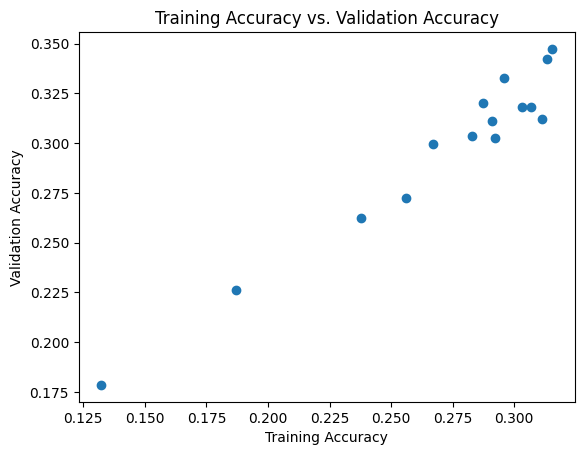

In [113]:
plt.scatter(history.history['accuracy'], history.history['val_accuracy'])
plt.title('Training Accuracy vs. Validation Accuracy')
plt.xlabel('Training Accuracy')
plt.ylabel('Validation Accuracy')
plt.show()

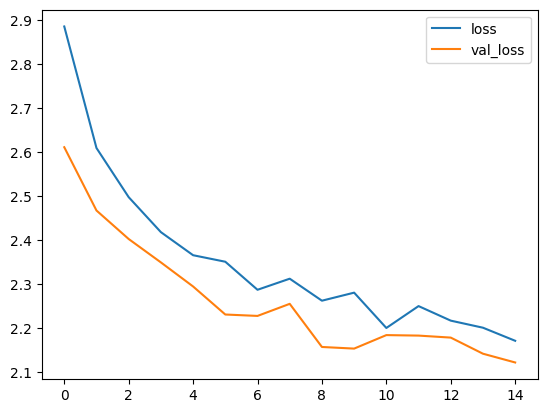

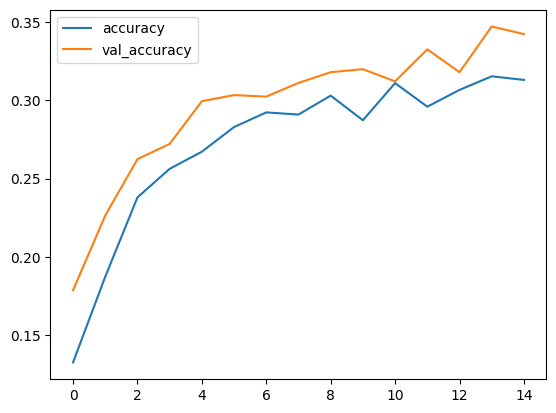

In [114]:
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()
plt.show()

In [102]:
y_pred = model.predict(x_test)
y_true = x_test.classes
class_labels = list(x_test.class_indices.keys())


321/321 [==============================] - 128s 381ms/step


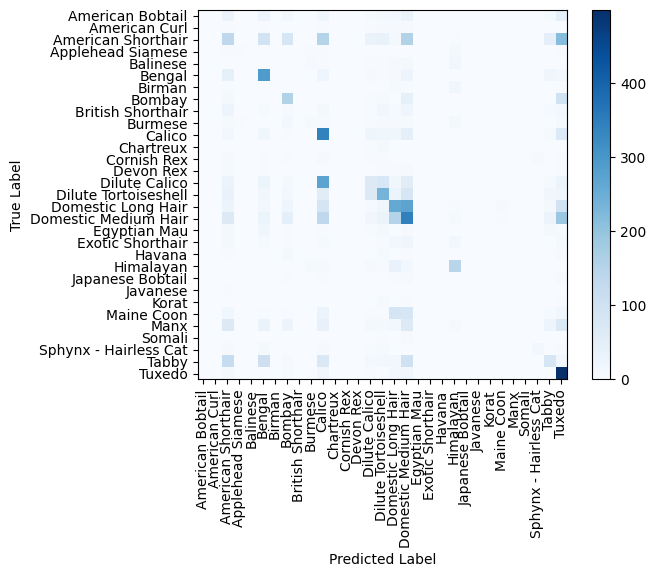

In [103]:
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [79]:
labels = x_train.class_indices
labels

{'American Bobtail': 0,
 'American Curl': 1,
 'American Shorthair': 2,
 'Applehead Siamese': 3,
 'Balinese': 4,
 'Bengal': 5,
 'Birman': 6,
 'Bombay': 7,
 'British Shorthair': 8,
 'Burmese': 9,
 'Calico': 10,
 'Chartreux': 11,
 'Cornish Rex': 12,
 'Devon Rex': 13,
 'Dilute Calico': 14,
 'Dilute Tortoiseshell': 15,
 'Domestic Long Hair': 16,
 'Domestic Medium Hair': 17,
 'Egyptian Mau': 18,
 'Exotic Shorthair': 19,
 'Havana': 20,
 'Himalayan': 21,
 'Japanese Bobtail': 22,
 'Javanese': 23,
 'Korat': 24,
 'Maine Coon': 25,
 'Manx': 26,
 'Somali': 27,
 'Sphynx - Hairless Cat': 28,
 'Tabby': 29,
 'Tuxedo': 30}

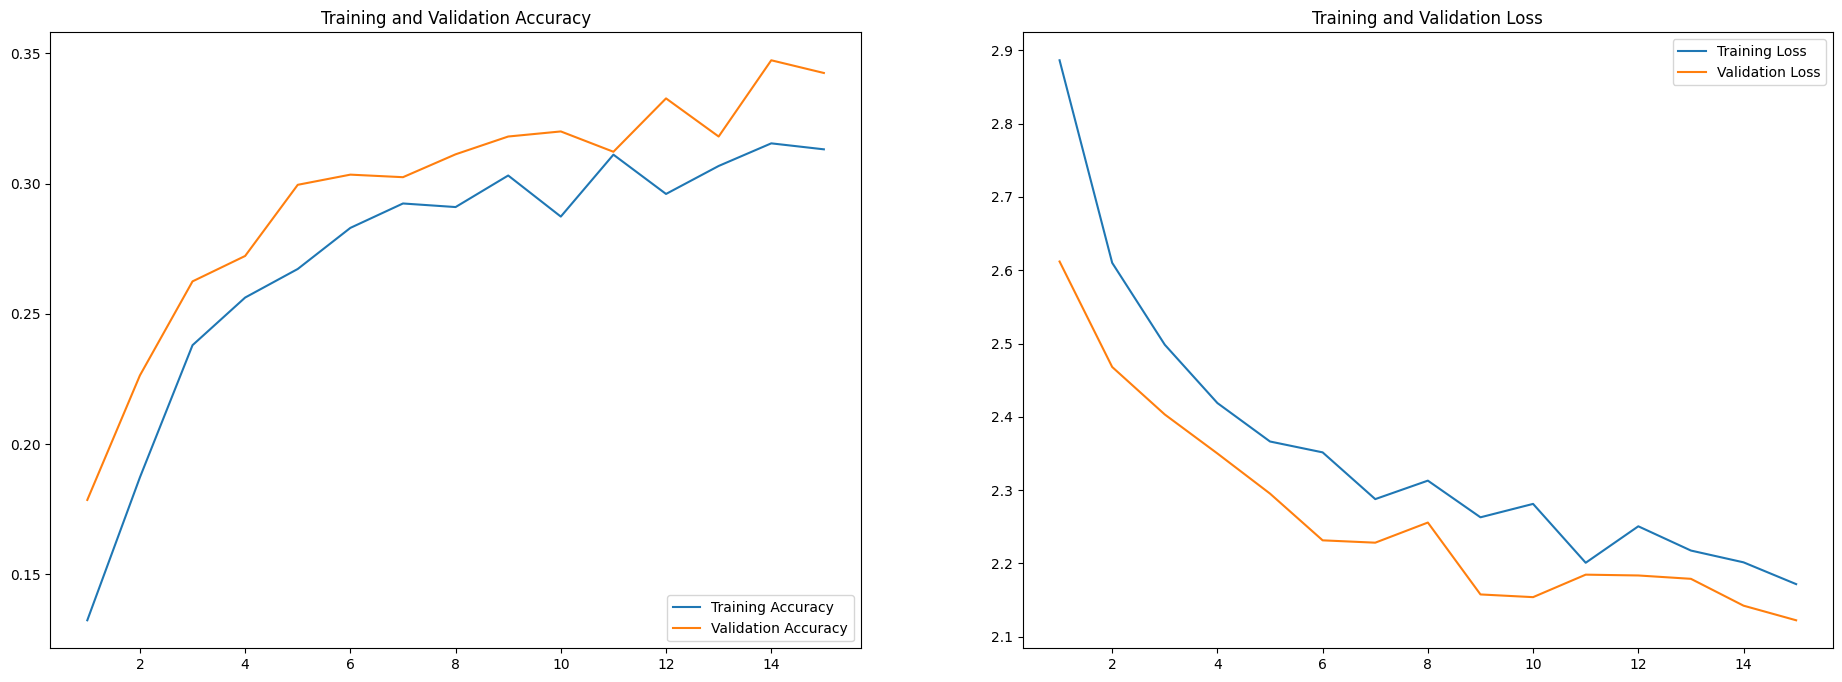

In [104]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

metrics = history.history['accuracy']
epochs_range = range(1, len(metrics) + 1) 

plt.figure(figsize=(23, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [107]:
model.evaluate(x_test,
               steps=175)

175/175 [==============================] - 84s 446ms/step - loss: 2.1571 - accuracy: 0.3193


[2.15708065032959, 0.31931427121162415]